# Load Glove and Convert to W2V

In [3]:
import gensim
from gensim.models import KeyedVectors

from gensim.models import Word2Vec
from gensim.scripts.glove2word2vec import glove2word2vec
from gensim.test.utils import datapath, get_tmpfile

import os


path_glove = os.path.abspath("glove.twitter.27B.200d.txt")
path_w2v = os.path.abspath("glove.twitter.27B.200d_w2v.txt")


glove_file = datapath(path_glove)
tmp_file = get_tmpfile(path_w2v)

_ = glove2word2vec(glove_file, tmp_file)


path = os.path.abspath("glove.twitter.27B.200d_w2v.txt")

model = KeyedVectors.load_word2vec_format(path, binary=False)

# Find Most Similar Words

In [4]:
model.most_similar(positive=["love"])

[('you', 0.8460860848426819),
 ('much', 0.7890046834945679),
 ('always', 0.7601684927940369),
 ('know', 0.75980544090271),
 ('my', 0.7519949674606323),
 ('and', 0.7513090372085571),
 ('loves', 0.7512385845184326),
 ('life', 0.7443932890892029),
 ('it', 0.7426839470863342),
 ("n't", 0.7408117055892944)]

In [5]:
model.most_similar(positive=["girl"])

[('boy', 0.8434209823608398),
 ('girls', 0.8288908004760742),
 ('she', 0.8030765056610107),
 ('guy', 0.787306010723114),
 ('woman', 0.7817049622535706),
 ('chick', 0.7750228643417358),
 ('friend', 0.7702169418334961),
 ('bitch', 0.7611054182052612),
 ('that', 0.7493616938591003),
 ('pretty', 0.7465851306915283)]

In [6]:
model.most_similar(positive=["boy"])

[('girl', 0.8434209823608398),
 ('guy', 0.7662351131439209),
 ('kid', 0.7430558204650879),
 ('baby', 0.7402151226997375),
 ('dude', 0.7393356561660767),
 ('boys', 0.726765513420105),
 ('man', 0.7174534797668457),
 ('boi', 0.7088537216186523),
 ('nigga', 0.704058825969696),
 ('brother', 0.7035762071609497)]

In [7]:
model.most_similar(positive=["man"])

[('dude', 0.7253455519676208),
 ('boy', 0.7174534797668457),
 ('guy', 0.6998012065887451),
 ('shit', 0.6852256655693054),
 ('was', 0.6779443621635437),
 ("'s", 0.6762615442276001),
 ('bad', 0.6734011769294739),
 ('men', 0.6714873909950256),
 ('that', 0.6709873080253601),
 ('lol', 0.6646672487258911)]

# Solving Analogies

In [10]:
import pandas as pd

# pretty print function
def pp(obj):
    print(pd.DataFrame(obj))


def analogy(worda, wordb, wordc):
    result = model.most_similar(negative=[worda], positive=[wordb, wordc])
    return result[0][0]


countries = ["australia", "canada", "germany", "ireland", "italy"]
foods = [analogy("us", "hamburger", country) for country in countries]
pp(zip(countries, foods))

           0             1
0  australia        hotdog
1     canada       poutine
2    germany       hamburg
3    ireland  cheeseburger
4      italy       bologna


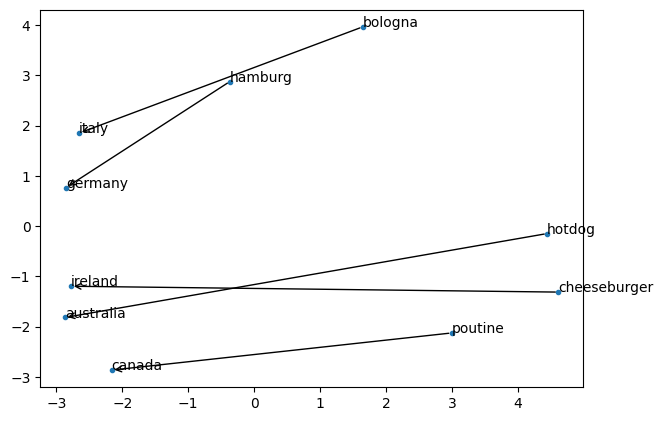

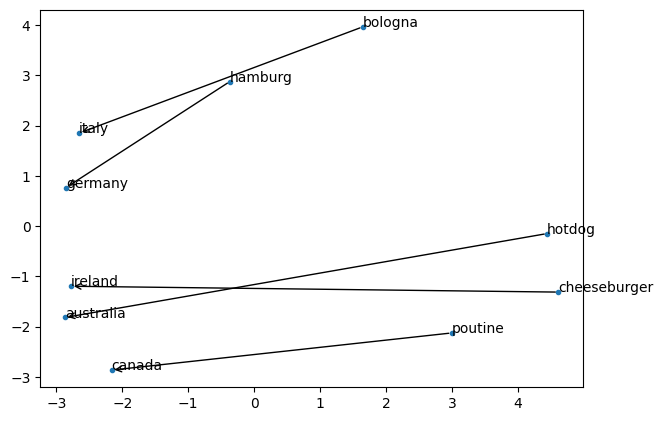

In [14]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np


def plot_data(orig_data, labels):
    pca = PCA(n_components=2)
    data = pca.fit_transform(orig_data)
    plt.figure(figsize=(7, 5), dpi=100)
    plt.plot(data[:, 0], data[:, 1], ".")
    for i in range(len(data)):
        plt.annotate(labels[i], xy=data[i])
    for i in range(len(data) // 2):
        plt.annotate(
            "",
            xy=data[i],
            xytext=data[i + len(data) // 2],
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3"),
        )
    plt.show()


labels = countries + foods
data = [model[w] for w in labels]
plot_data(data, labels)